<a href="https://colab.research.google.com/github/Samplergithub769/Stock-Predictions-Model/blob/main/Stock_Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [142]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [143]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2012-01-03,16.513794,16.573130,16.641375,16.248346,16.262545,147611217
2012-01-04,16.585020,16.644611,16.693678,16.453827,16.563665,114989399
2012-01-05,16.354961,16.413727,16.537264,16.344486,16.491436,131808205
2012-01-06,16.131855,16.189817,16.438385,16.184088,16.417213,108119746
2012-01-09,15.447884,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...
2022-12-14,94.968765,95.309998,97.220001,93.940002,95.540001,26452900
2022-12-15,90.873482,91.199997,94.029999,90.430000,93.540001,28298800


In [144]:
data.reset_index(inplace=True)

In [145]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04,16.585020,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05,16.354961,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06,16.131855,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09,15.447884,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14,94.968765,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15,90.873482,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16,90.534698,90.860001,91.750000,90.010002,91.199997,48485500


In [146]:
ma_100_days=data.Close.rolling(100).mean()


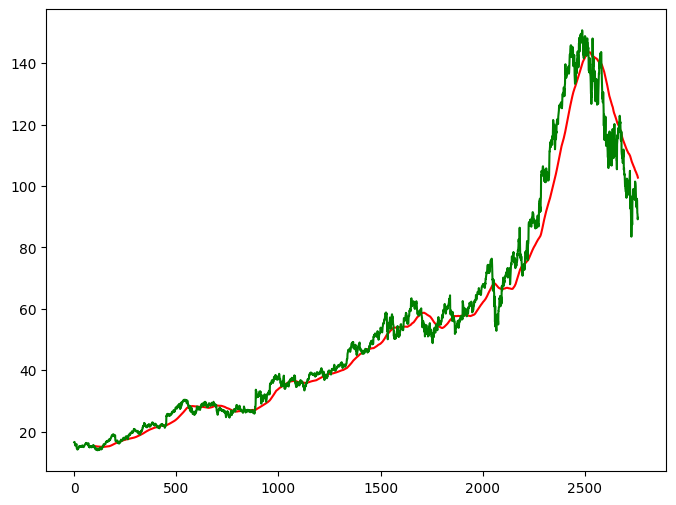

In [147]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [148]:
ma_200_days = data.Close.rolling(200).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

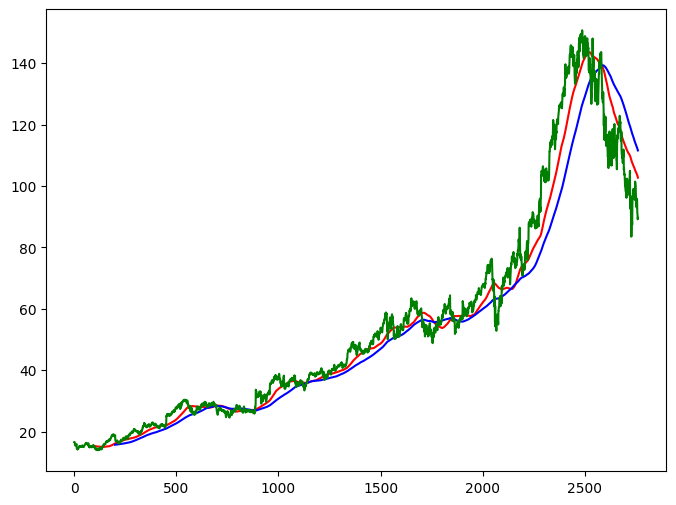

In [149]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show

In [150]:
data.dropna(inplace=True)

In [151]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [152]:
data_train.shape[0],data_test.shape[0]

(2208, 553)

In [153]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [154]:
data_train_scale=scaler.fit_transform(data_train)

In [155]:
x=[]
y=[]

for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [156]:
x,y=np.array(x),np.array(y)

In [157]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [158]:
model=Sequential()
model.add(LSTM(units=50,activation='relu', return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))







/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [159]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [160]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 151ms/step - loss: 0.0641
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.0080
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0060
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0073
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0054
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0046
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0044
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0043
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0040
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0042
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0041
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0033
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0037
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0031
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0033
Ep

In [161]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [162]:
pas_100_days=data_train.tail(100)

In [163]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [164]:
data_test

Ticker,GOOG
0,70.335999
1,70.139999
2,70.521004
3,70.850998
4,70.891998
...,...
648,95.309998
649,91.199997
650,90.860001
651,89.150002


In [165]:
data_test_scale=scaler.fit_transform(data_test)

In [166]:
x=[]
y=[]

for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [167]:
x.shape,y.shape

((553, 100, 1), (553,))

In [168]:
y_predict=model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


In [169]:
y_predict.shape

(553, 1)

In [170]:
y_predict

array([[0.11338463],
       [0.11286516],
       [0.11334178],
       [0.11484915],
       [0.11728971],
       [0.12052643],
       [0.12430638],
       [0.12839495],
       [0.13266695],
       [0.13709405],
       [0.14172712],
       [0.1465028 ],
       [0.15133266],
       [0.15597579],
       [0.1602442 ],
       [0.16411453],
       [0.16765068],
       [0.17100096],
       [0.17450339],
       [0.17846519],
       [0.18301034],
       [0.18813005],
       [0.19370069],
       [0.19956926],
       [0.20553678],
       [0.2114817 ],
       [0.21732074],
       [0.2229946 ],
       [0.22844751],
       [0.23362279],
       [0.23844656],
       [0.2428097 ],
       [0.24667701],
       [0.25010347],
       [0.25319022],
       [0.25598758],
       [0.25858718],
       [0.2611812 ],
       [0.26394838],
       [0.26701677],
       [0.27043128],
       [0.2741733 ],
       [0.27812862],
       [0.2821048 ],
       [0.28587195],
       [0.28925347],
       [0.29213464],
       [0.294

In [171]:
scale=1/scaler.scale_

In [172]:
y_predict = y_predict*scale

In [173]:
y = y*scale

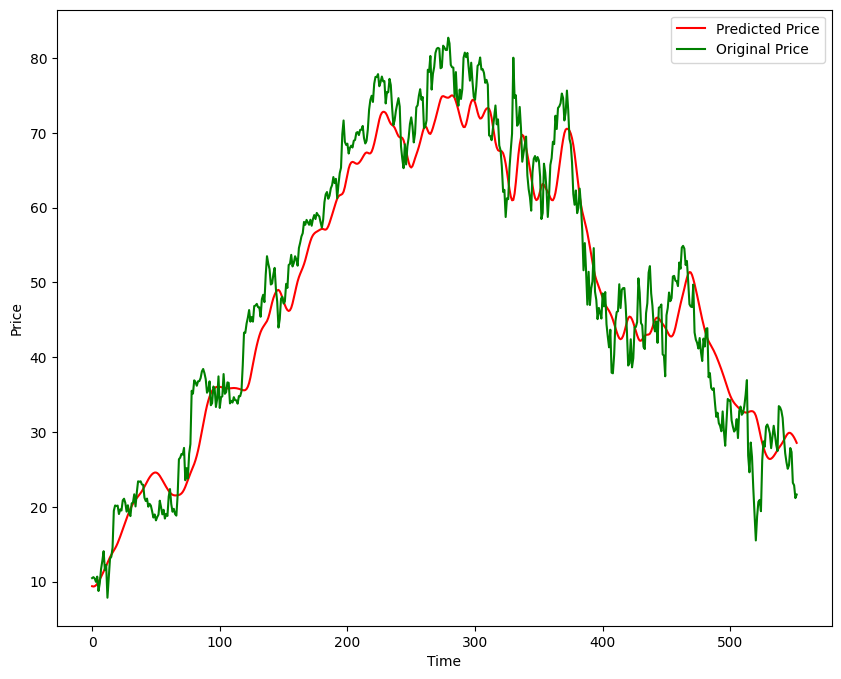

In [174]:


plt.figure(figsize=(10, 8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [175]:
model.save('Stock Predictions Model.keras')